## Import Necessary Libraries

In [31]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

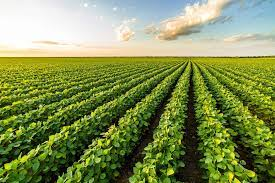

With our environment constantly changing, it is of utmost importance to grow the right crop at under a certain group of conditions. Thus, this project emphasises on choosing the right crop under a specific group of environmental conditions.

## Import Data 

In [32]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Preliminary Data Inspection 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Observation: 
- There are 2200 rows and 8 columns in the dataset with no missing values.

- All values in the data are numerical except for the label data.

In [4]:
df[df.duplicated()] 

,N,P,K,temperature,humidity,ph,rainfall,label


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In the steps above, we checked that dataset does not contain any duplicated tuples or missing values.

## EDA

In [34]:
df.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]

In [35]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Variable names are changed so that dataset can be more easily compreheneded by anyone

In [36]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### This describes the various statistics for each variable of the dataset.

#### For example, the mean of the temperature is 48.14(2dp), the minimum temperature is 14.25(2dp) and the maximum temperature is 43.68(2dp).

In [33]:
dfnumeric = pd.DataFrame(df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature','Humidity','pH','Rainfall']])
dfnumeric.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


#### This code is to bring out the numeric variables.

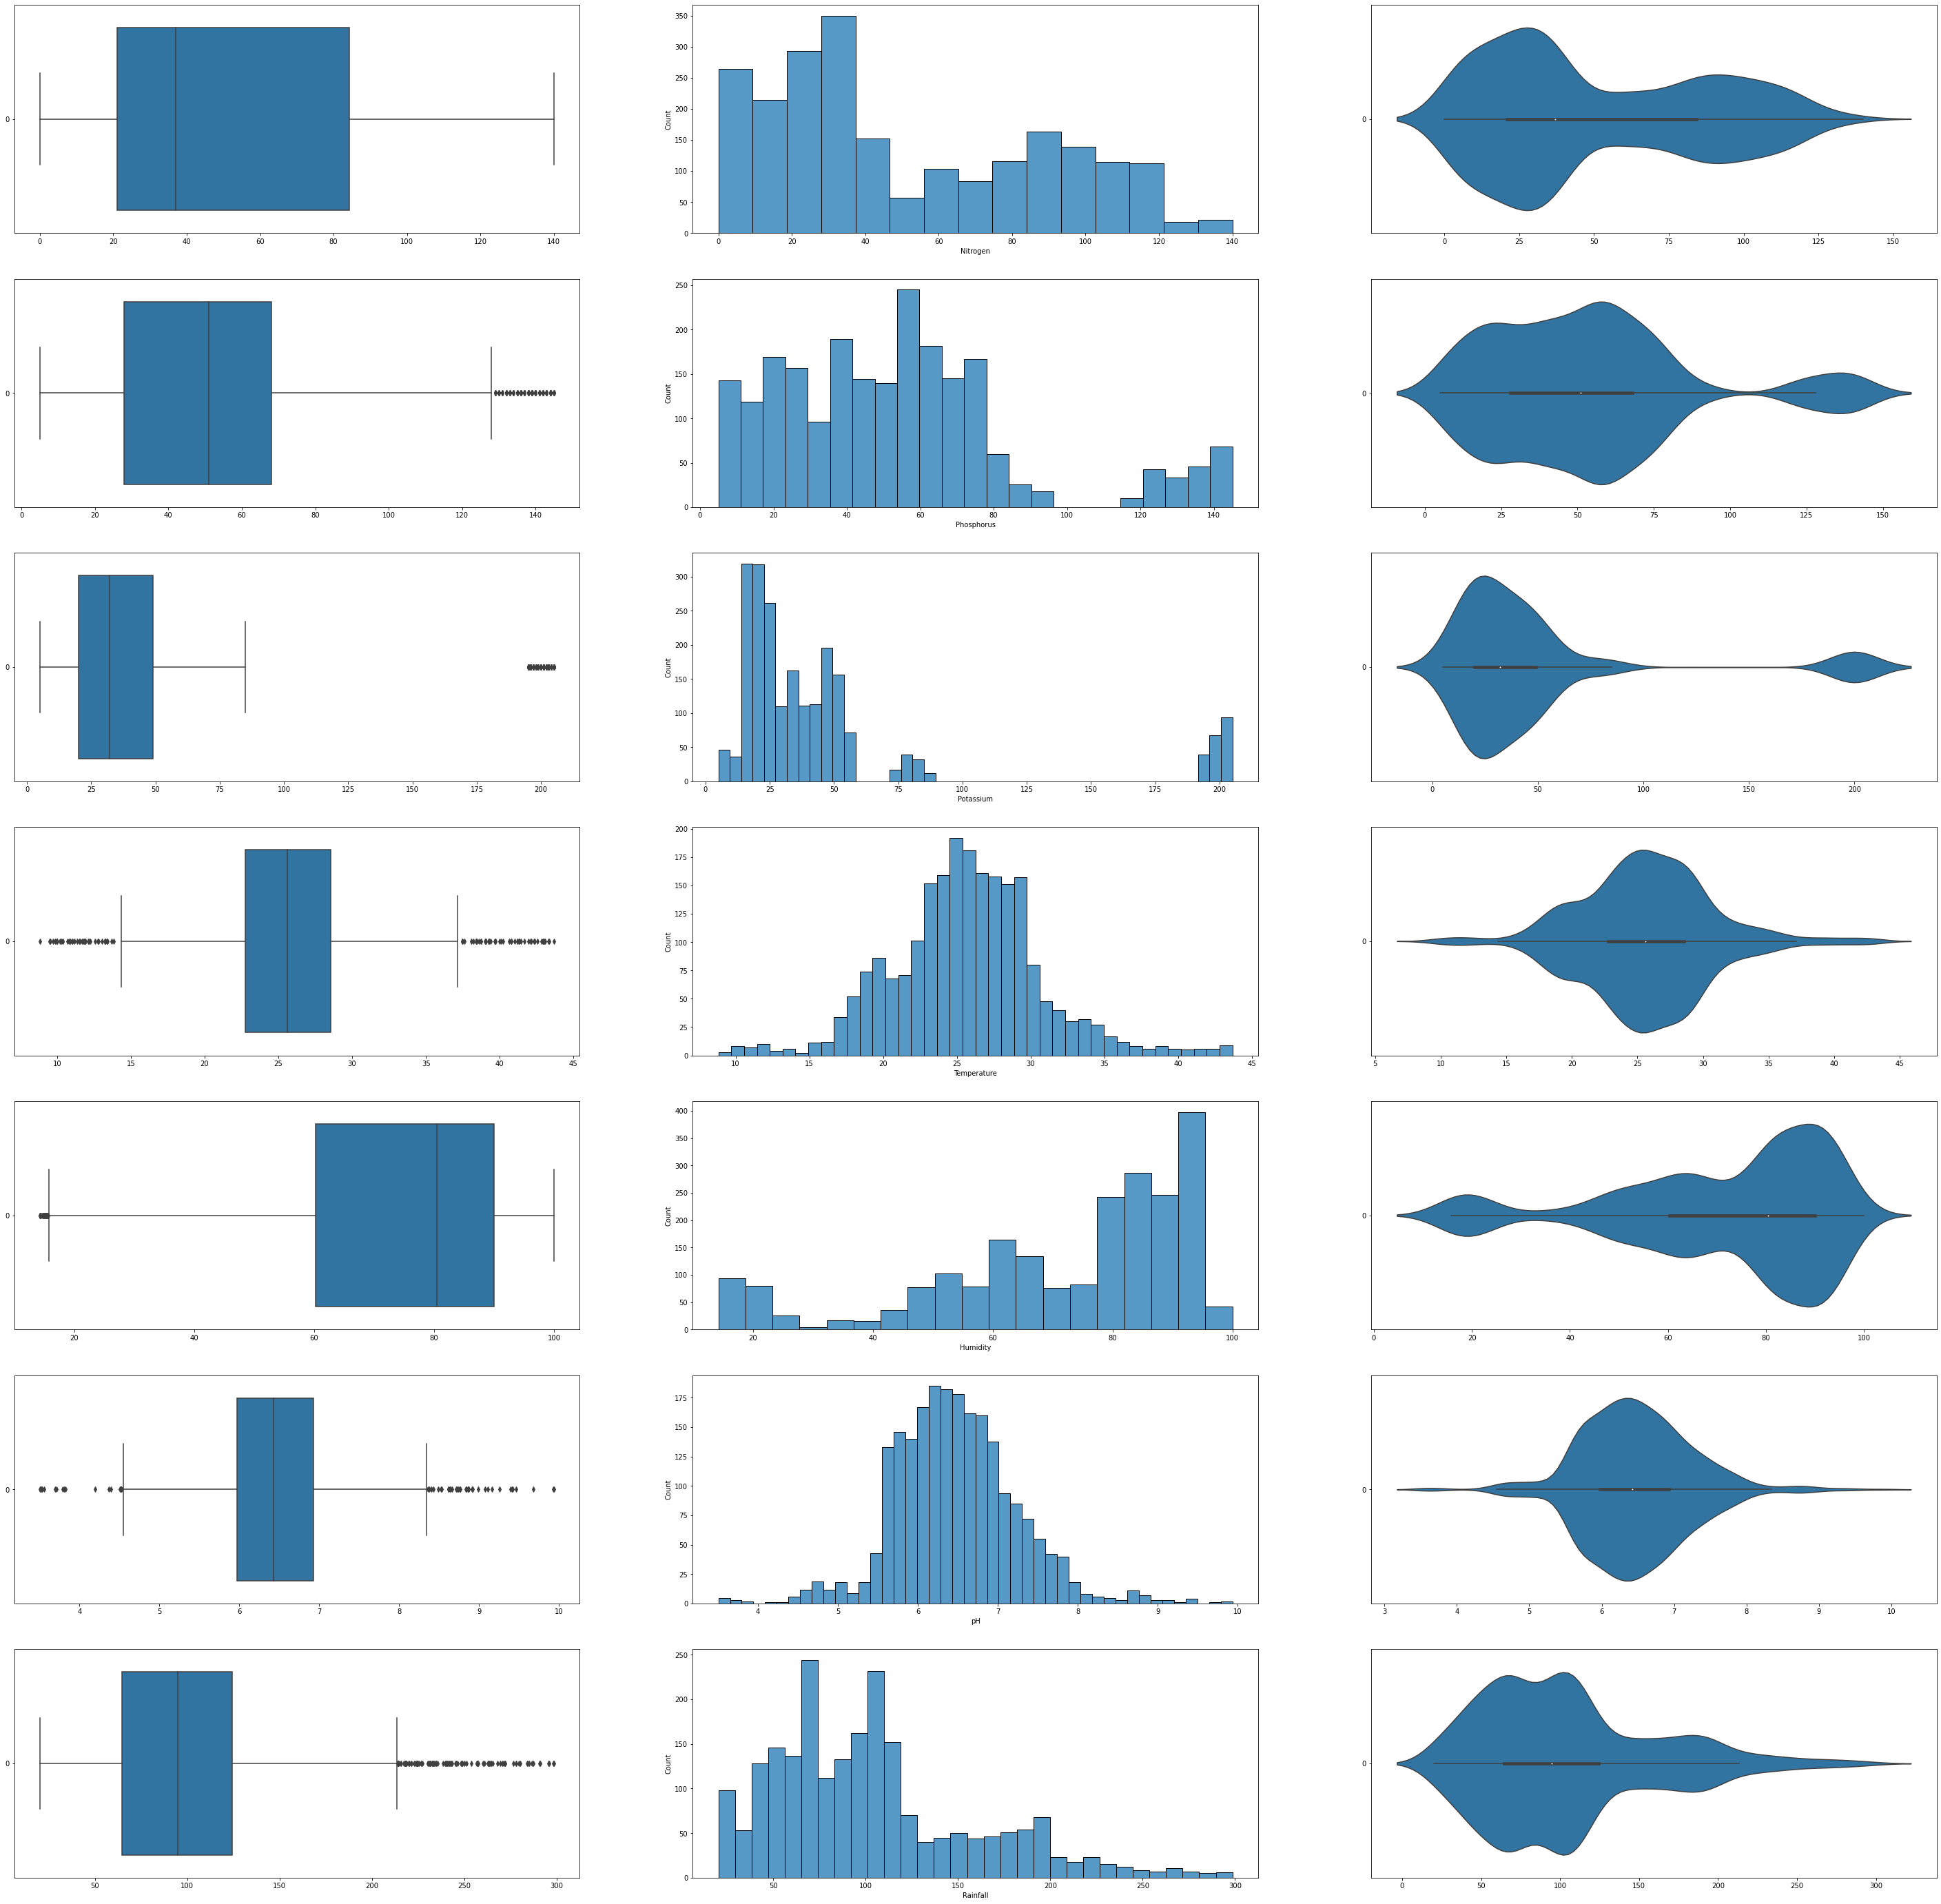

In [34]:
f, axes = plt.subplots(7, 3, figsize=(50, 50))

count = 0
for var in dfnumeric:
    sb.boxplot(data = dfnumeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = dfnumeric[var], ax = axes[count,1])
    sb.violinplot(data = dfnumeric[var], orient = "h", ax = axes[count,2])
    count += 1

#### This is the visualisation of the each variable in 3 types of plots ( boxplot, histogram and a violin plot).

#### To count the number of outliers in each numeric variable:

In [35]:
Q1 = dfnumeric.quantile(0.25)
Q3 = dfnumeric.quantile(0.75)

# Rule to identify outliers
rule = ((dfnumeric < (Q1 - 1.5 * (Q3 - Q1))) | (dfnumeric > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

Nitrogen         0
Phosphorus     138
Potassium      200
Temperature     86
Humidity        30
pH              57
Rainfall       100
dtype: int64

#### This code shows the number of outliers in each numeric variable. We can infer that the variable K has the highest number of outliers.

#### - Can use N for analysis

In [36]:
dfcategorical  = pd.DataFrame(df["Crop"])
dfcategorical

,Crop
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [11]:
dfcategorical.nunique()

label    22
dtype: int64

#### This code shows the number of labels (the different types of crops) used in the data set

In [37]:
print("Number of various crops: ", len(dfcategorical['Crop'].unique()))
print("List of crops: ", dfcategorical['Crop'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


#### This code shows the different types of crops used in this dataset

In [38]:
dfcategorical.value_counts()

Crop       
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64

#### This code shows the number of elements in each label. In this case, all the labels have 100 elements.

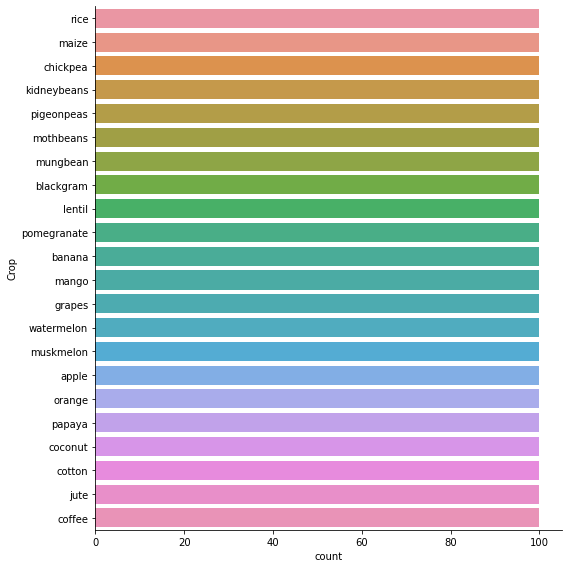

In [40]:
sb.catplot(y = 'Crop', data = dfcategorical, kind = "count", height = 8)

#### This code shows categorical plot of the variable 'label'. It shows that there are equal number of elements.

<AxesSubplot:>

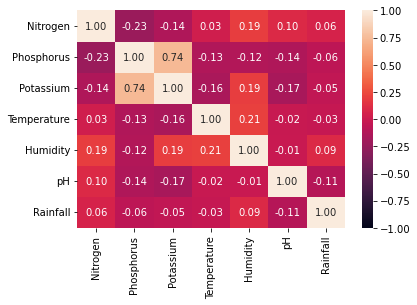

In [41]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### From this heatmap, we can infer that for the whole dataset, 'Phosphorus' and 'Potassium' has the highest correlation of +0.74.

In [42]:
Phosphorus = pd.DataFrame(df['Phosphorus'])
Potassium = pd.DataFrame(df['Potassium'])
Phosphorus

,Phosphorus
0,42
1,58
2,55
3,35
4,42
...,...
2195,34
2196,15
2197,33
2198,32


In [43]:
Potassium

,Potassium
0,43
1,41
2,44
3,40
4,42
...,...
2195,32
2196,27
2197,30
2198,34


#### Since Phosphorus and Potassium has the highest correlation, we create a data frame for both variables.

In [44]:
Phosphorus.describe()

,Phosphorus
count,2200.000000
mean,53.362727
std,32.985883
min,5.000000
25%,28.000000
50%,51.000000
75%,68.000000
max,145.000000


In [45]:
Potassium.describe()

,Potassium
count,2200.000000
mean,48.149091
std,50.647931
min,5.000000
25%,20.000000
50%,32.000000
75%,49.000000
max,205.000000


#### Above describes the summary statistics for P and K

<AxesSubplot:>

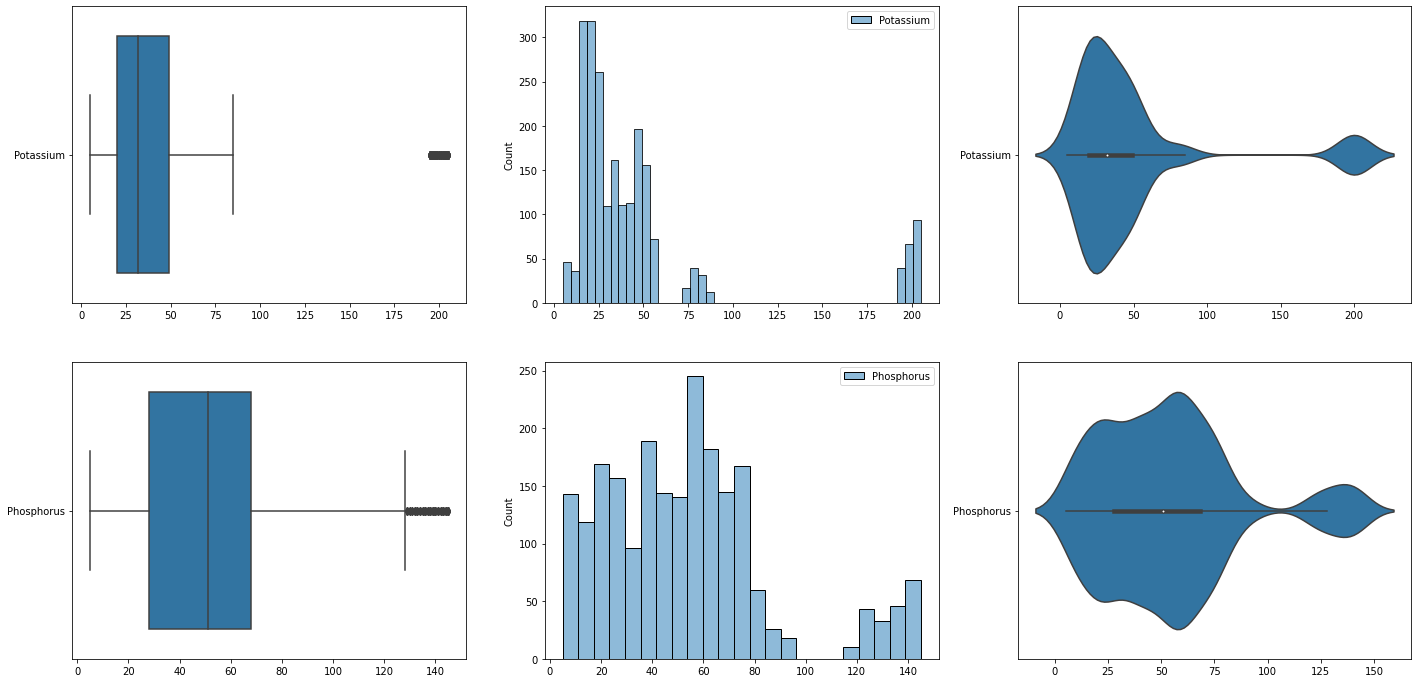

In [46]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))


sb.boxplot(data = Potassium, orient = "h", ax = axes[0,0])
sb.histplot(data = Potassium, ax = axes[0,1])
sb.violinplot(data = Potassium, orient = "h", ax = axes[0,2])


sb.boxplot(data = Phosphorus, orient = "h", ax = axes[1,0])
sb.histplot(data = Phosphorus, ax = axes[1,1])
sb.violinplot(data = Phosphorus, orient = "h", ax = axes[1,2])

## Comparing crops against climate features

<AxesSubplot:xlabel='Potassium', ylabel='Crop'>

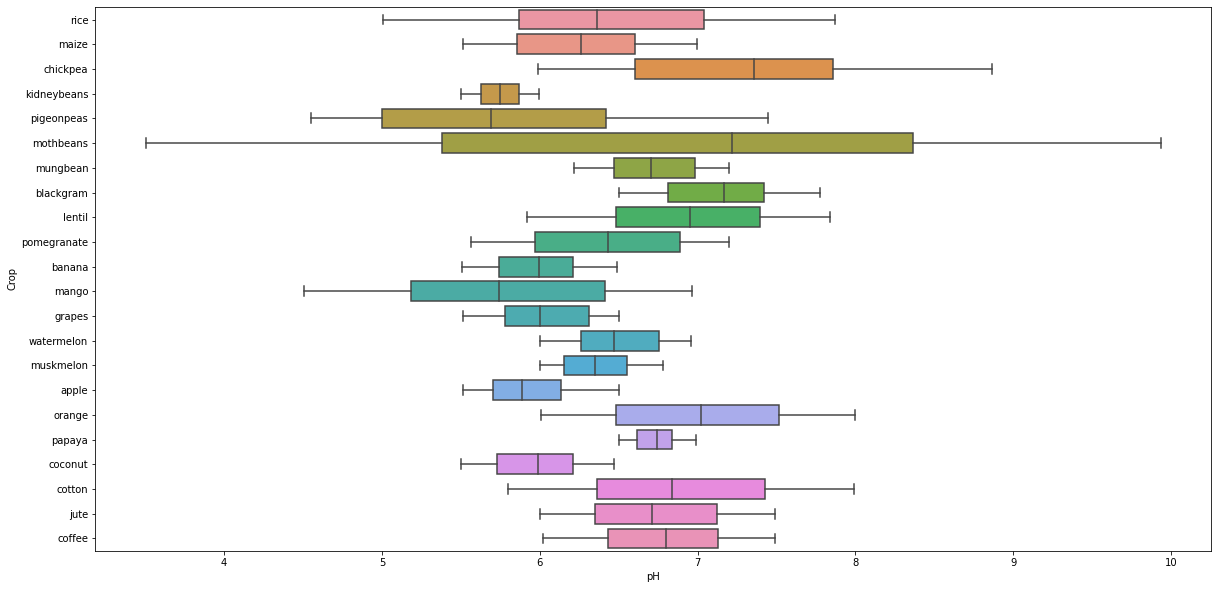

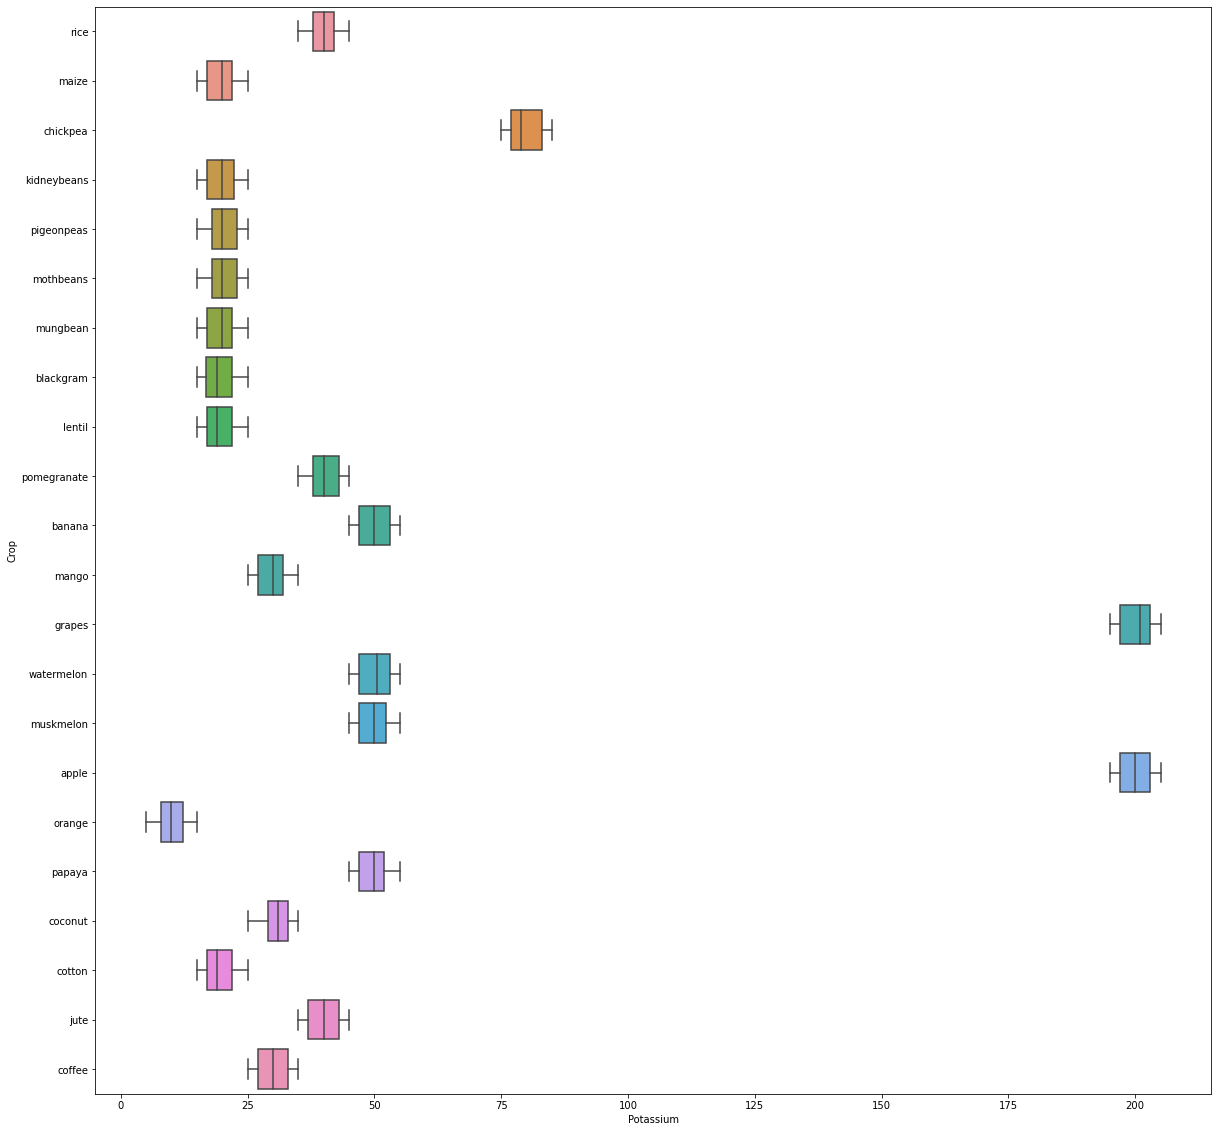

In [52]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='pH',data=df)


fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Potassium',data=df)

This boxplot shows the distribution of each crop across different pH and K values

<AxesSubplot:xlabel='P', ylabel='label'>

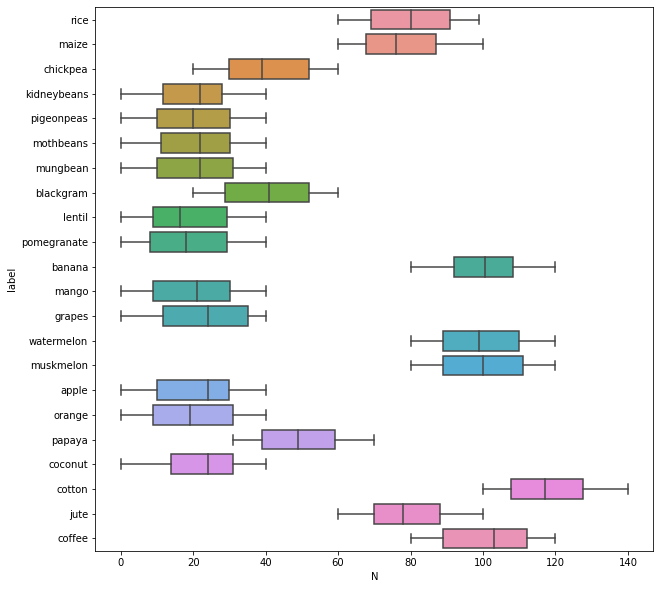

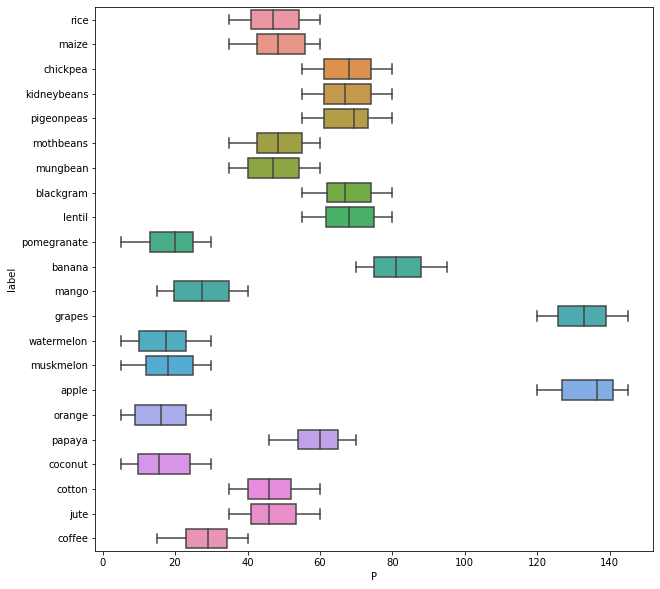

In [25]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Nitrogen',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Phosphorus',data=df)


This boxplot shows the distribution of each crop across different N and P values

<AxesSubplot:xlabel='humidity', ylabel='label'>

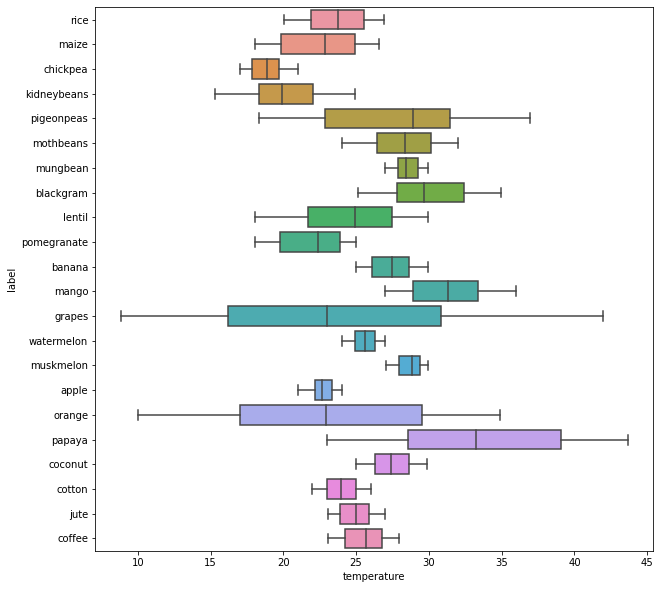

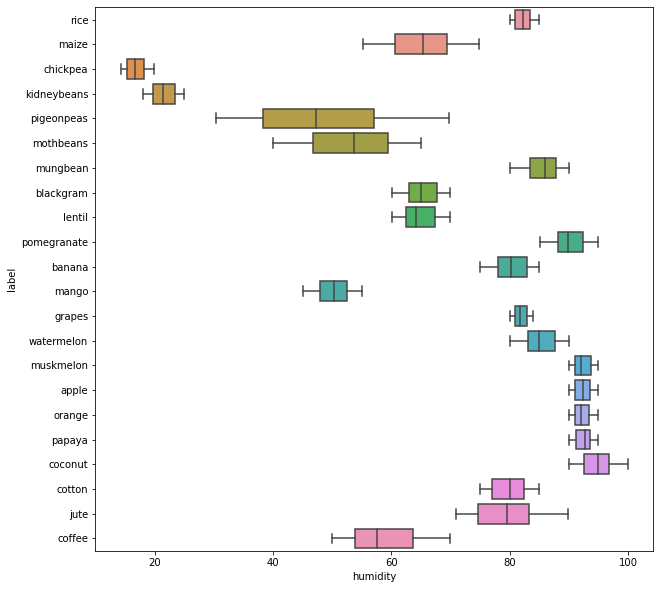

In [28]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Temperature',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Humidity',data=df)


This boxplot shows the distribution of each crop across different temperature and humidity values

<AxesSubplot:xlabel='Rainfall', ylabel='Crop'>

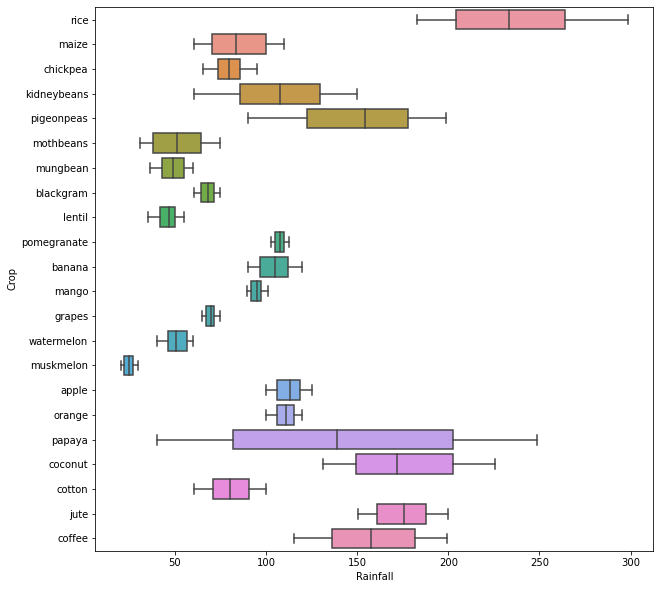

In [48]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Rainfall',data=df)



This boxplot shows the distribution of each crop across different rainfall values

In [39]:
sb.catplot(x='Nitrogen', y='Crop', 
            data=df,
            kind='point')

In [38]:
sb.catplot(x='Phosphorus', y='Crop', 
            data=df,
            kind='point')

In [41]:
sb.catplot(x='Potassium', y='Crop', 
            data=df,
            kind='point')

In [42]:
sb.catplot(x='Temperature', y='Crop', 
            data=df,
            kind='point')

In [43]:
sb.catplot(x='Humidity', y='Crop', 
            data=df,
            kind='point')

In [44]:
sb.catplot(x='pH', y='Crop', 
            data=df,
            kind='point')

In [45]:
sb.catplot(x='Rainfall', y='Crop', 
            data=df,
            kind='point')